<center>

#### Data Mining & Text Analytics
#### Math 3310

# Analyzing Murder Rate in Relation to Socioeconomic and Demographic Variables

#### Dr. Jishan Ahmed
#### Fall 2025

</center>


## Importing packages
We import our standard libraries at this top level.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Importing Packages for Classical Statistical Analysis

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm


## Data Exploration

In [ ]:
# To load the saved CSV file into a pandas DataFrame
df = pd.read_csv('../crime.csv')
# Displaying the first few rows of the dataset, similar to R's head() function.
df.head(5)

,state,murder.rate,poverty,high.school,college,single.parent,unemployed,metropolitan,region
0,Alabama,7.4,14.7,77.5,20.4,26.0,4.6,70.2,South
1,Alaska,4.3,8.4,90.4,28.1,23.2,6.6,41.6,West
2,Arizona,7.0,13.5,85.1,24.6,23.5,3.9,87.9,West
3,Arkansas,6.3,15.8,81.7,18.4,24.7,4.4,49.0,South
4,California,6.1,14.0,81.2,27.5,21.8,4.9,96.7,West


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          50 non-null     object 
 1   murder.rate    50 non-null     float64
 2   poverty        50 non-null     float64
 3   high.school    50 non-null     float64
 4   college        50 non-null     float64
 5   single.parent  50 non-null     float64
 6   unemployed     50 non-null     float64
 7   metropolitan   50 non-null     float64
 8   region         50 non-null     object 
dtypes: float64(7), object(2)
memory usage: 3.6+ KB


In [5]:
# Assuming 'df' is your DataFrame
df = df.rename(columns={col: col.replace('.', '_') for col in df.columns})
df.columns

Index(['state', 'murder_rate', 'poverty', 'high_school', 'college',
       'single_parent', 'unemployed', 'metropolitan', 'region'],
      dtype='object')

**Note**

Using a period (.) in variable names such as `murder.rate` and `high.school` may cause issues in certain programming environments. To avoid this, we have converted them to `murder_rate` and `high_school`, respectively, by replacing the periods with underscores (_).


# Part 1: Classical Statistics Approach
## Question 1: Building the Model

a.  Using the `statsmodels` Python API, construct a multiple linear regression model to predict the murder rate based on the socioeconomic and demographic variables provided in the dataset.

b. Include all relevant variables in your initial model. Use the `anova_lm()` function from `statsmodels` to compare nested models and identify which predictors can be omitted without significantly reducing the model's predictive power.



## Full Model

In [6]:
np.random.seed(1) #Generate the same random number every time with the same seed value.
# Initial model using formula API
full_model = smf.ols('murder_rate ~ poverty +high_school + college + single_parent + unemployed + metropolitan + C(region)', data=df).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            murder_rate   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     9.851
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           9.29e-08
Time:                        23:09:18   Log-Likelihood:                -87.253
No. Observations:                  50   AIC:                             194.5
Df Residuals:                      40   BIC:                             213.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.1557     11.067      0.104      0.917     -21.211      23.523
C(region)[T.Northeast]    -2.5701      0.767     -3.352      0.002      -4.120      -1.021
C(region)[T.South]        -0.1230      0.776     -0.159      0.875      -1.691       1.445
C(region)[T.West]         -0.8346      0.760     -1.098      0.279      -2.371       0.702
poverty                    0.0712      0.126      0.565      0.575      -0.184       0.326
high_school               -0.1253      0.118     -1.061      0.295      -0.364       0.113
college                    0.0837      0.082      1.016      0.316      -0.083       0.250
single_parent              0.3801      0.106      3.600      0.001       0.167       0.594
unemployed                 0.2952      0.331      0.891      0.378      -0.374       0.965
metropolitan               0.0309      0.015      2.015      0.051   -8.58e-05       0.062
==============================================================================
Omnibus:                        0.463   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.475
Skew:                          -0.213   Prob(JB):                        0.789
Kurtosis:                       2.783   Cond. No.                     5.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Reduced Model

Based on our statistical analysis, the variables `poverty`, `high_school`, `college`, and `unemployed` have been excluded from the full model. This decision is justified because their p-values exceeded the 0.05 threshold, indicating that they are not statistically significant.

In [7]:
np.random.seed(2)
# Initial model using formula API
reduced_model = smf.ols('murder_rate ~single_parent + metropolitan + C(region)', data=df).fit()
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            murder_rate   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     16.50
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           3.73e-09
Time:                        23:09:18   Log-Likelihood:                -90.057
No. Observations:                  50   AIC:                             192.1
Df Residuals:                      44   BIC:                             203.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -8.4447      2.010     -4.201      0.000     -12.496      -4.393
C(region)[T.Northeast]    -2.2926      0.713     -3.214      0.002      -3.730      -0.855
C(region)[T.South]         0.5124      0.681      0.753      0.456      -0.859       1.884
C(region)[T.West]         -0.2438      0.627     -0.389      0.699      -1.507       1.020
single_parent              0.4747      0.090      5.291      0.000       0.294       0.656
metropolitan               0.0363      0.011      3.234      0.002       0.014       0.059
==============================================================================
Omnibus:                        1.103   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.576   Jarque-Bera (JB):                0.440
Skew:                          -0.148   Prob(JB):                        0.803
Kurtosis:                       3.351   Cond. No.                         681.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Compare nested models using anova_lm()
anova_table = anova_lm(reduced_model,full_model)
print(anova_table)

   df_resid         ssr  df_diff    ss_diff         F    Pr(>F)
0      44.0  107.387079      0.0        NaN       NaN       NaN
1      40.0   95.990894      4.0  11.396185  1.187215  0.331174


c. Justify your choice of the final model, focusing on the importance of included variables and the rationale for excluding others.

**Note**

Given the comparison of the full model and the reduced model, here's what we can conclude:

- Both models have nearly identical adjusted R-squared values, with the full model at 0.619 and the reduced model at 0.613. This indicates that both models explain a similar amount of variance in the murder rate when adjusting for the number of predictors.

- The ANOVA test comparing the full and reduced models yields a p-value of 0.331174, which is well above the conventional threshold of 0.05 for statistical significance. This suggests that the additional parameters in the full model do not provide a significantly better fit to the data than the reduced model.

- In light of these findings, and adhering to the principle of parsimony, the reduced model is preferred. It is simpler and avoids the unnecessary complexity of additional parameters that do not significantly enhance the model's explanatory power. A simpler model is advantageous because it is easier to interpret, less likely to overfit, and often more generalizable.


## Question 2: Model Diagnostics

a) Perform diagnostics on your final model to assess whether it meets the standard assumptions of linear regression. Use visualization tools (normal QQ plot, residual plot, and time series plot) to examine normality, constant variance, and independence of errors.

b) If you find any violations of these assumptions (e.g., heteroscedasticity), propose and apply transformations to the dependent variable (murder rate) using functions such as `log()` or `sqrt()` to mitigate these issues.

c) Discuss how each transformation impacts the model and the assumptions.



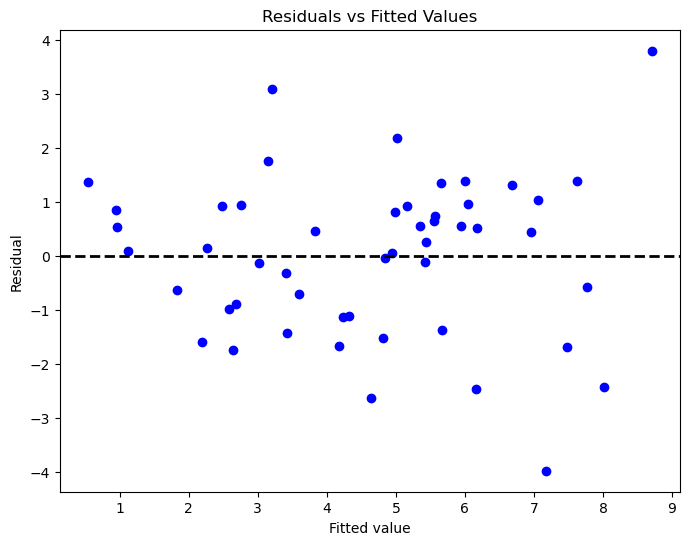

In [9]:
# Plotting the residuals against the fitted values
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(reduced_model.fittedvalues, reduced_model.resid, color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residuals vs Fitted Values')
plt.show()


**Note**

The assumption of homoscedasticity, which implies that the residuals should have constant variance across all levels of the predictor variables, appears to be violated in our model. This is evidenced by a funnel-shaped pattern observed in the plot of residuals versus fitted values. Such a pattern typically indicates heteroscedasticity, meaning that the variability of the residuals is not consistent across the range of the predictor variables. Addressing this issue may require transforming the dependent variable or using variance-stabilizing techniques in our regression model.


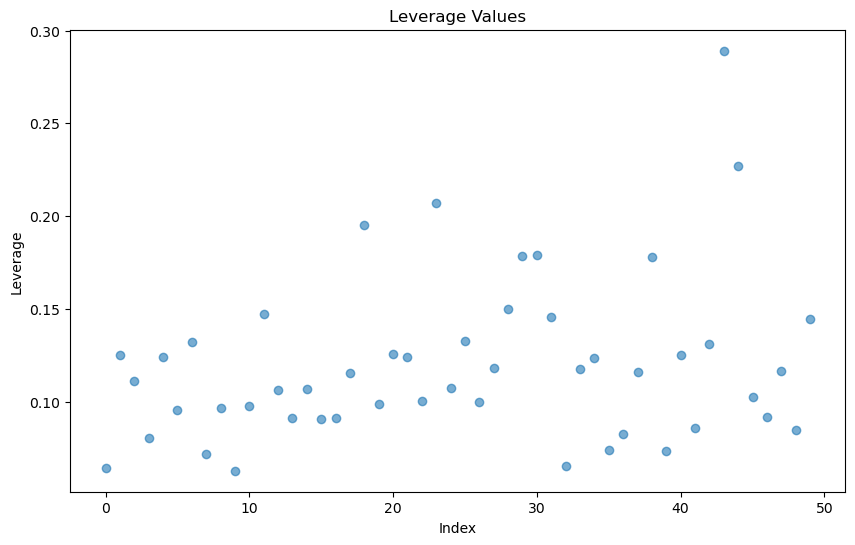

In [10]:
# Plotting the leverage for each observation in the Boston dataset
# Calculate leverage
influence = reduced_model.get_influence()
leverage =influence.hat_matrix_diag
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(leverage)), leverage, alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Leverage')
plt.title('Leverage Values')
plt.show()


**Note**

- Most data points seem to have low to moderate leverage values, indicating that they are within a reasonable range of the values of the independent variables.
- A few points have notably higher leverage, as they are set apart from the cluster of the rest, especially the one near the upper right. These points merit further investigation as they could be influential observations that might unduly affect the regression model.

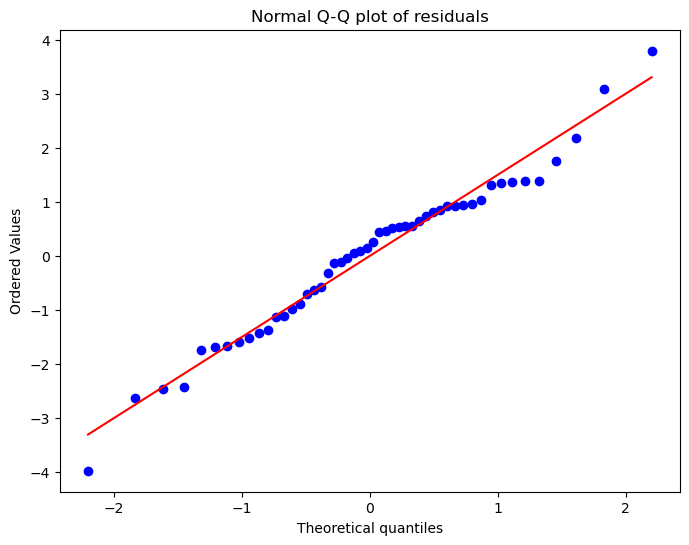

In [11]:
# Generating a Q-Q plot for the residuals to assess normality
plt.figure(figsize=(8, 6))
stats.probplot(reduced_model.resid, dist="norm", plot=plt)
plt.title('Normal Q-Q plot of residuals')
plt.show()

**Note**

- For the most part, the points closely follow the reference line, suggesting that the residuals are normally distributed, especially around the mean.  
- Towards the ends, there is some deviation from the line, indicating that the residuals have heavier tails than expected under normality. This could suggest the presence of outliers or that the distribution has higher kurtosis than the normal distribution.
- This departure from the line at the ends is common in real-world data and doesn't necessarily invalidate the regression model, but it might warrant a deeper look into the extremities of your data to check for outliers, influential points, or other anomalies.

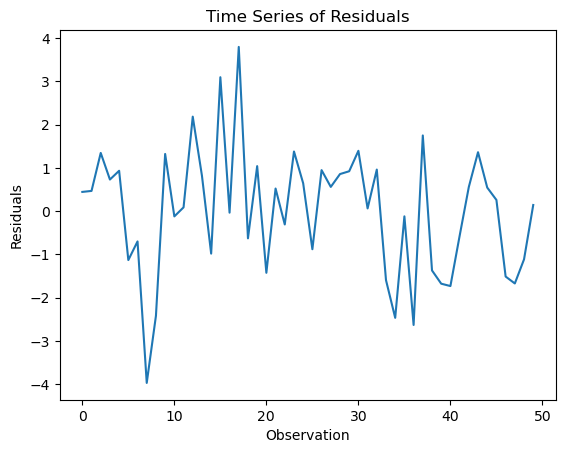

In [12]:
plt.plot(reduced_model.resid)
plt.title('Time Series of Residuals')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.show()

**Note**

- There does not appear to be any clear or systematic pattern in the residuals. There are no obvious trends, cycles, or repeating patterns.
- The residuals fluctuate above and below the zero line without forming any discernible pattern, which is consistent with the assumption of no autocorrelation.

## Log Transformation

Due to the observed violation of the constant variance assumption, I considered applying a log transformation to the response variable. The residuals vs. fitted values plot suggests that the constant variance assumption is now satisfied after the transformation, indicating improved homoscedasticity. However, the subsequent Q-Q plot reveals a slight departure from the normality of the error terms. The log transformation does not appear to have fully addressed the normality issue. Given these circumstances, it would likely be a prudent approach to further investigate the outliers in the data, as they may be influencing the distribution of residuals and affecting our model's assumptions.


In [13]:
np.random.seed(3)
# Transformation suggestion: log transformation of the dependent variable
df['log_murder_rate'] = np.log(df['murder_rate'])
transformed_model_formula = 'log_murder_rate ~single_parent + metropolitan + C(region)'
transformed_model = smf.ols(transformed_model_formula, data=df).fit()
# Summary of the transformed model
print(transformed_model.summary())

                            OLS Regression Results                            
Dep. Variable:        log_murder_rate   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     16.59
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           3.45e-09
Time:                        23:09:19   Log-Likelihood:                -23.239
No. Observations:                  50   AIC:                             58.48
Df Residuals:                      44   BIC:                             69.95
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2

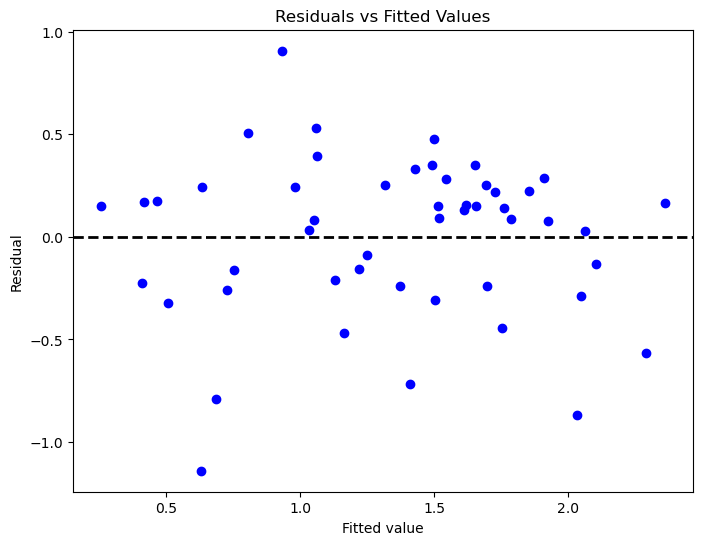

In [14]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(transformed_model.fittedvalues, transformed_model.resid, color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residuals vs Fitted Values')
plt.show()

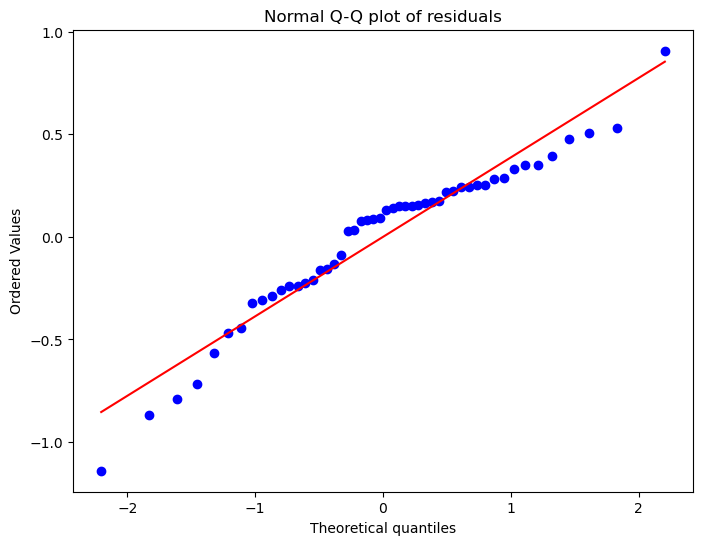

In [15]:
# Generating a Q-Q plot for the residuals to assess normality
plt.figure(figsize=(8, 6))
stats.probplot(transformed_model.resid, dist="norm", plot=plt)
plt.title('Normal Q-Q plot of residuals')
plt.show()

## Part 2: Machine Learning Approach

### Question 1: Regression Analysis with Scikit-learn

Apply a machine learning approach to the problem using Scikit-learn's `LinearRegression` model:

a) Split your data into training and testing sets, ensuring both the predictors (X) and the target variable (murder rate, y) are included.

b) Fit the model to the training data and then use it to make predictions on the testing set.

c) Illustrate your findings by creating a scatter plot of the actual vs. predicted murder rates. Draw a line that represents the model's predictions across the data points.


## Importing Packages for Machine Learning Approach

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# determine categorical and numerical features
numerical_ix = df.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = df.select_dtypes(include=['object', 'bool']).columns

In [18]:
categorical_ix

Index(['state', 'region'], dtype='object')

In [19]:
numerical_ix

Index(['murder_rate', 'poverty', 'high_school', 'college', 'single_parent',
       'unemployed', 'metropolitan', 'log_murder_rate'],
      dtype='object')

In [20]:
# Separate predictors and target variable
X = df.drop(['state', 'murder_rate'], axis=1)
y = df['murder_rate']

In [21]:
# determine categorical and numerical features
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns
numerical_ix, categorical_ix 

(Index(['poverty', 'high_school', 'college', 'single_parent', 'unemployed',
        'metropolitan', 'log_murder_rate'],
       dtype='object'),
 Index(['region'], dtype='object'))

In [22]:
# define the data preparation for the columns
t = [('cat', OneHotEncoder(), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)
# define the model
model = LinearRegression()
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)])

In [23]:
np.random.seed(4)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  Index(['region'], dtype='object')),
                                                 ('num', MinMaxScaler(),
                                                  Index(['poverty', 'high_school', 'college', 'single_parent', 'unemployed',
       'metropolitan', 'log_murder_rate'],
      dtype='object'))])),
                ('m', LinearRegression())])

In [24]:
# Make predictions
y_pred = pipeline.predict(X_test)

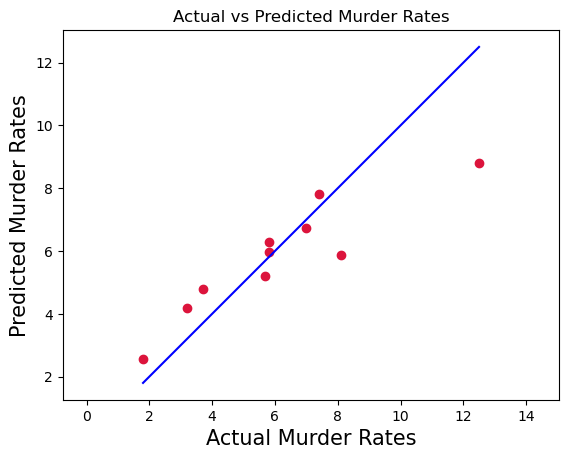

In [25]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Murder Rates', fontsize=15)
plt.ylabel('Predicted Murder Rates', fontsize=15)
plt.title('Actual vs Predicted Murder Rates')
plt.axis('equal')
plt.show()

In [26]:
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {test_mse:.3f}')
print(f'Test R^2: {test_r2:.3f}')


Test MSE: 2.213
Test R^2: 0.725


### Question 2: Model Comparison

Finally, compare the classical statistical approach and the machine learning approach by:

 a) Adjusted R-Squared Metric
Calculate and interpret the Adjusted \(R^2\) metric for both models. The classical regression provides an Adjusted \(R^2\) directly, which can be compared to the \(R^2\) from the machine learning model once the Adjusted \(R^2\) for it is computed.

 b) Strengths and Limitations
Discuss the strengths and limitations of each approach in the context of this analysis. Consider aspects such as interpretability, complexity, and the ability to handle non-linear relationships.

 c) Recommendations for Further Research
Make recommendations for further research or analysis that could help refine the understanding of the factors influencing murder rates. This might include additional variables, alternative modeling techniques, or different data sources.


## Response:

Given the results from the classical regression approach and the machine learning approach, we can compare the two methods as follows:

### a) Adjusted \(R^2\) Comparison
The classical regression model has an Adjusted \(R^2\) of 0.613, which indicates that approximately 61.3% of the variance in the murder rate can be explained by the model's predictors after adjusting for the number of predictors. In contrast, the machine learning model, which yields an \(R^2\) of 0.725, does not provide an Adjusted \(R^2\). 

### b) Strengths and Limitations
- **Classical Regression**: The classical approach provides a detailed statistical analysis, including the significance of predictors and diagnostic metrics for the assumptions of the linear model. This method allows for a more nuanced understanding of the relationship between variables and the target.
  
- **Machine Learning Approach**: The machine learning model might be able to capture more complex patterns in the data. It typically excels in prediction accuracy but lacks the interpretability of statistical models. It may also be more susceptible to overfitting if not properly validated.

### c) Recommendations for Further Research
Further research could involve:
- Cross-validation to better estimate the machine learning model's performance.
- Incorporating interaction terms and polynomial features to explore non-linear relationships in the classical model.
- Utilizing regularization techniques in machine learning to prevent overfitting and improve model generalization.



The analysis offers valuable insights into the factors influencing murder rates. For policymakers and researchers, the models suggest that socioeconomic and demographic variables play a significant role. Policymakers might consider interventions targeting the most influential predictors, while researchers could expand the analysis to include additional variables or data sources. Ultimately, the goal is to develop a nuanced understanding of crime rates to inform effective and evidence-based social policy.
